# Unsupervised Learning

In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## K-Means Clustering: Theory
- An unsupervised algorithm used to group data into 'k' clusters.
- Algorithm Steps:
  1. Choose number of clusters (k).
  2. Randomly assign k centroids.
  3. Assign each point to the nearest centroid.
  4. Update centroids by taking the mean of assigned points.
  5. Repeat steps 3–4 until convergence.

Key Idea:
- The algorithm tries to group similar data points together while keeping different groups as far apart as possible.

In [563]:
data = pd.read_csv('/content/penguins.csv')
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [564]:
data.shape

(344, 5)

In [565]:
data.isnull().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


In [566]:
data = data.dropna()

In [567]:
X = data[['culmen_length_mm','body_mass_g']]
y = data['sex']

In [568]:
data = data.drop(columns=['sex'],axis=1)

In [569]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [570]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [571]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

In [572]:
labels = kmeans.labels_
labels

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1], dtype=int32)

In [573]:
centroids = kmeans.cluster_centers_
centroids

array([[  46.97894737, 5025.65789474],
       [  42.00324675, 3647.72727273]])

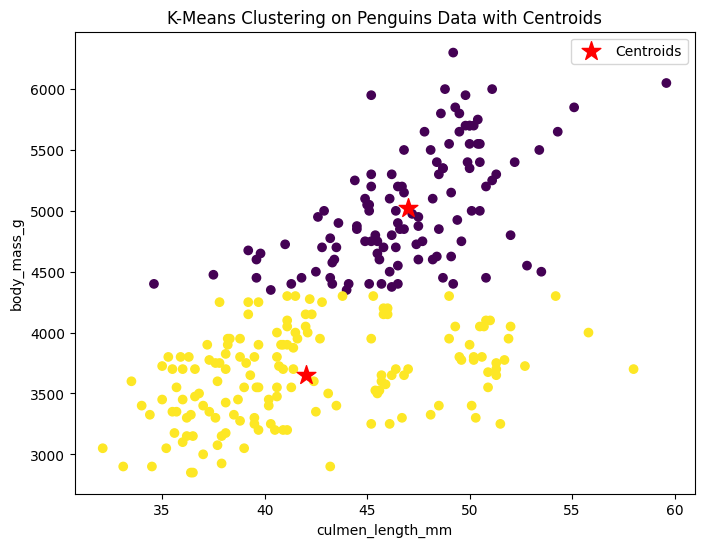

In [574]:
plt.figure(figsize=(8,6))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.title('K-Means Clustering on Penguins Data with Centroids')
plt.legend()
plt.show()

### Choosing k: Elbow Method

wcss --> within cluster sum of squares

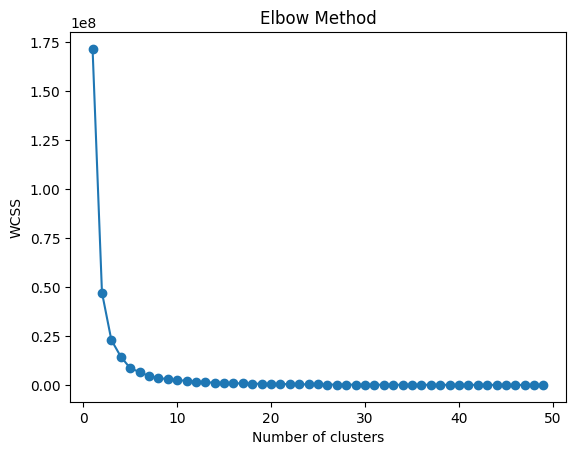

In [575]:
wcss = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,50), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

## PCA: Principal Component Analysis (Theory)
- A dimensionality reduction technique.
- Goal: Reduce number of features while retaining most variance.

Steps:
1. Standardize the data.
2. Find new axes (principal components) that explain maximum variance.
3. Keep only the top few components to represent the data.

Key Idea:
- PCA simplifies data while keeping most of the information.
- Useful for visualization and speeding up ML models.

In [576]:
df = pd.read_csv('/content/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [577]:
df.shape

(178, 14)

In [578]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [579]:
X = df.drop(columns=['Customer_Segment'],axis=1)
y = df['Customer_Segment']

In [580]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [581]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

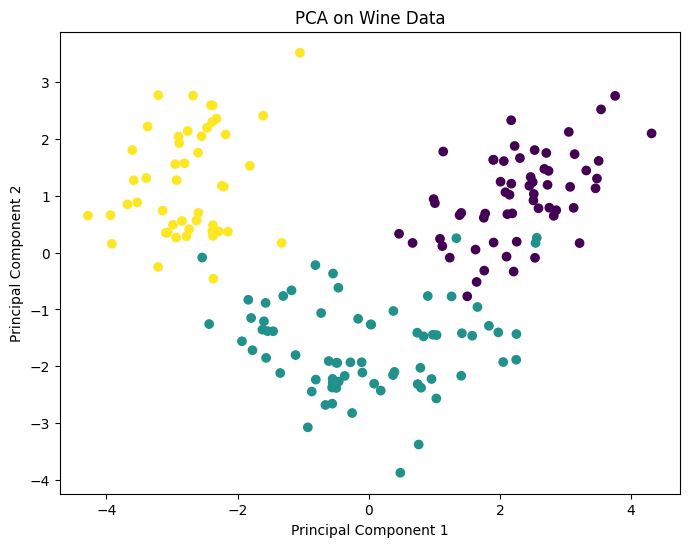

In [582]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Data')
plt.show()

In [583]:
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.36198848 0.1920749 ]
